In [1]:
from helpers import *

In [2]:
goi_id = getGOI()

_, X_log, y_log, X_log_train, X_log_test, _, _ = getProcessedData(goi_id)

_, _, X_test_corr = getCorrAndHighCorrFeatures(X_log, y_log, X_log_train, X_log_test)

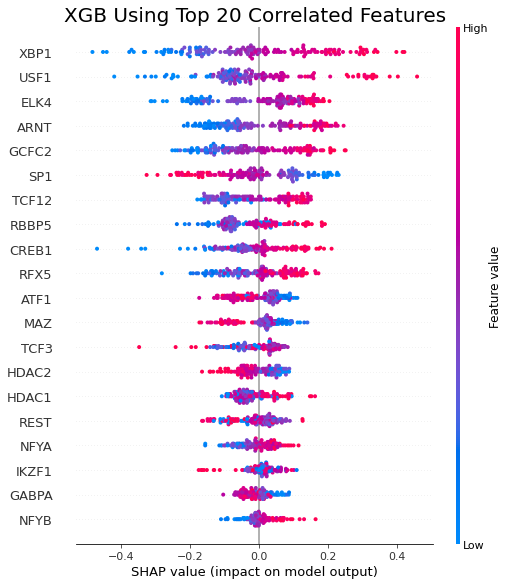

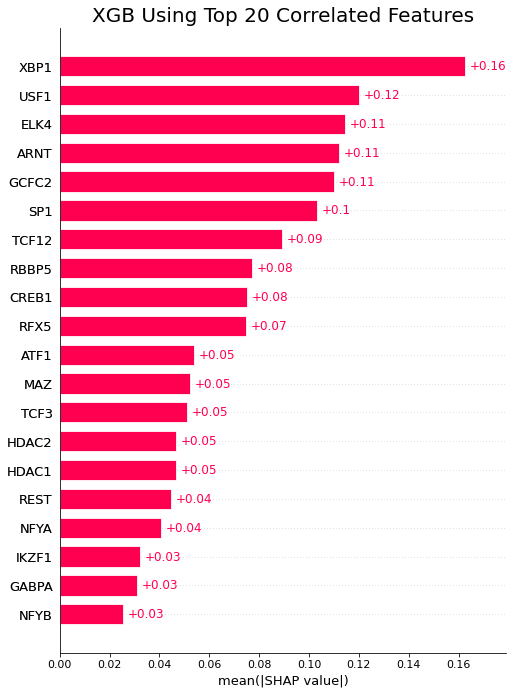

In [3]:
#corrxgb
shapPlots("../models/XGB_TOP20_CORR_PARAMS", "XGB Using Top 20 Correlated Features", X_test_corr)

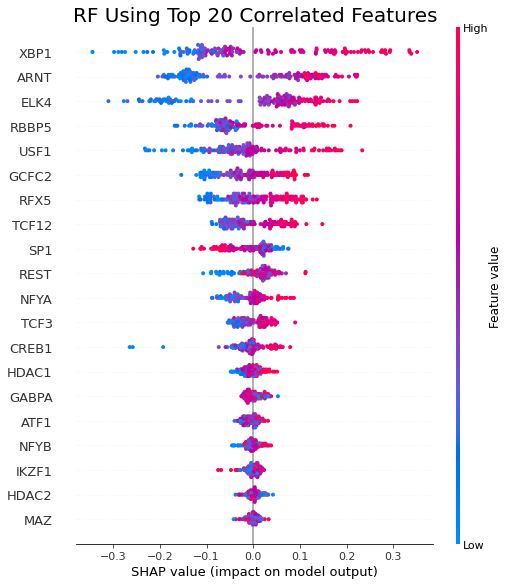

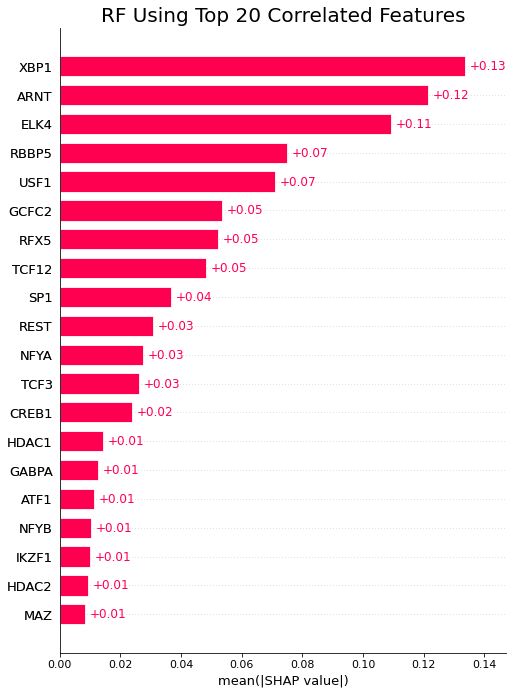

In [4]:
#corr RF
shapPlots("../models/RF_TOP20_CORR_PARAMS", "RF Using Top 20 Correlated Features", X_test_corr)

In [5]:
X_XGBperm_test = X_log_test[pd.read_csv('../summary/analysis/CD46_XGB_perm.csv').loc[:19, 'feature']]

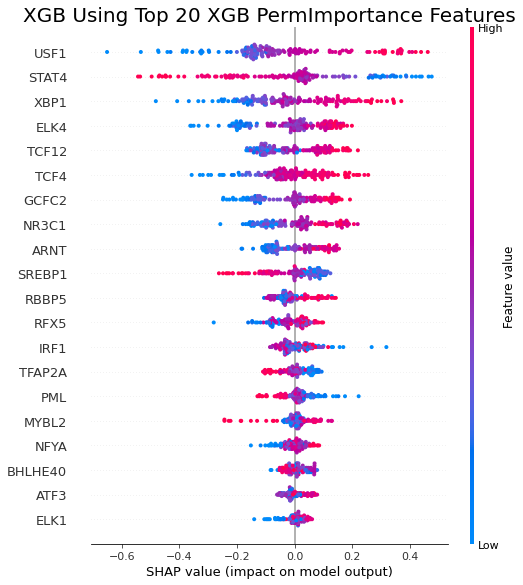

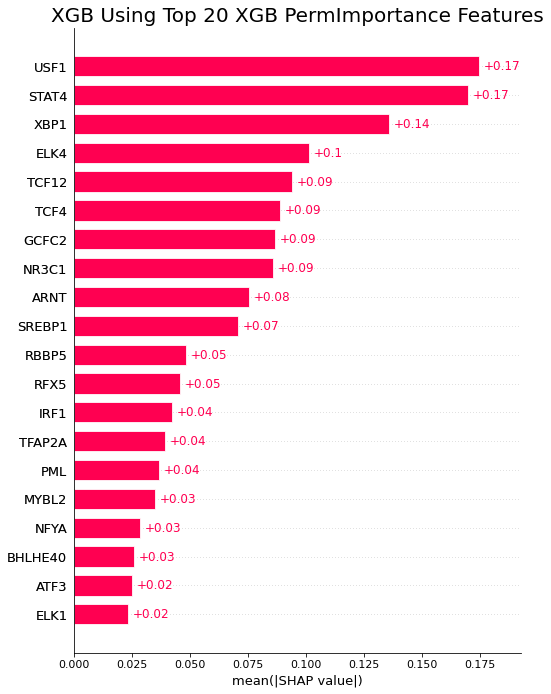

In [6]:
# xgb xgb perm importance
shapPlots("../models/XGB_TOP20_XGB_PERM_PARAMS", "XGB Using Top 20 XGB PermImportance Features", X_XGBperm_test)

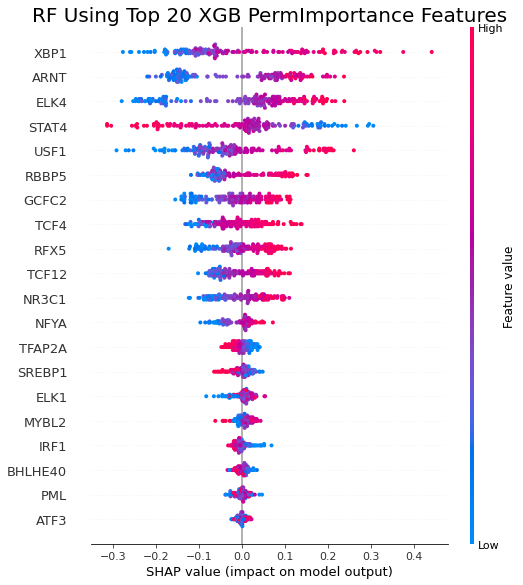

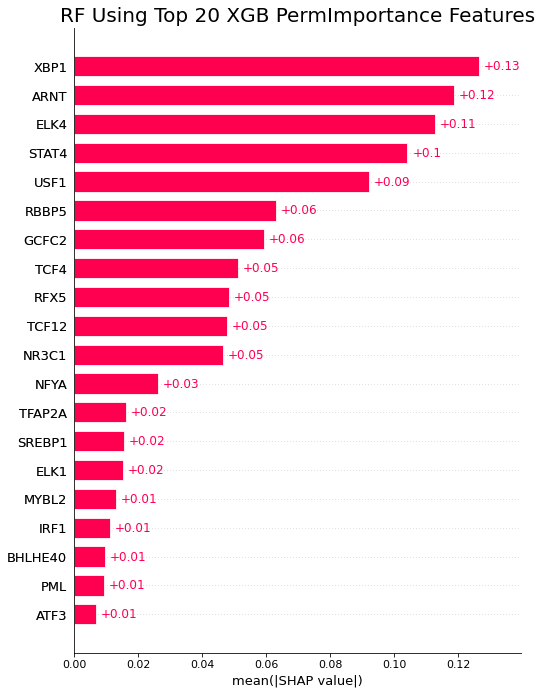

In [7]:
# rf xgb perm importance
shapPlots("../models/RF_TOP20_XGB_PERM_PARAMS", "RF Using Top 20 XGB PermImportance Features", X_XGBperm_test)

In [8]:
X_RFperm_test = X_log_test[pd.read_csv('../summary/analysis/CD46_RF_perm.csv').loc[:19, 'feature']]

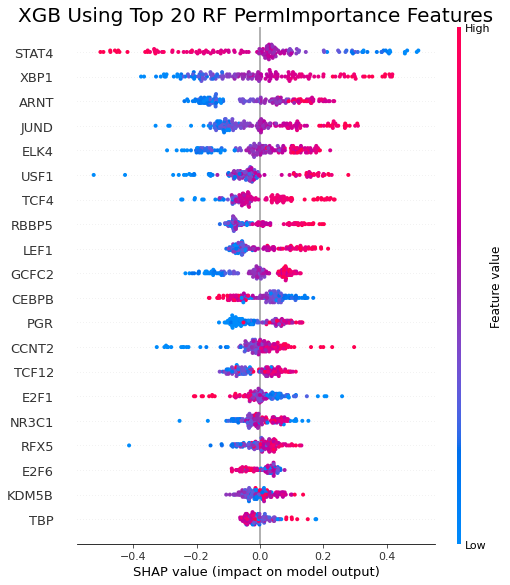

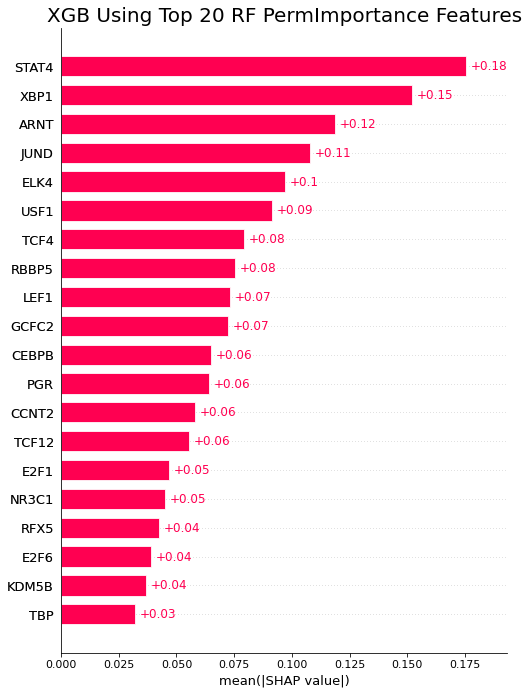

In [9]:
# xgb rf perm importance
shapPlots("../models/XGB_TOP20_RF_PERM_PARAMS", "XGB Using Top 20 RF PermImportance Features", X_RFperm_test)

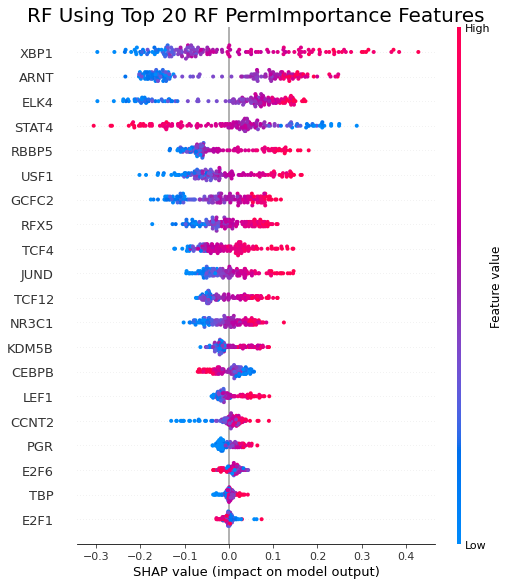

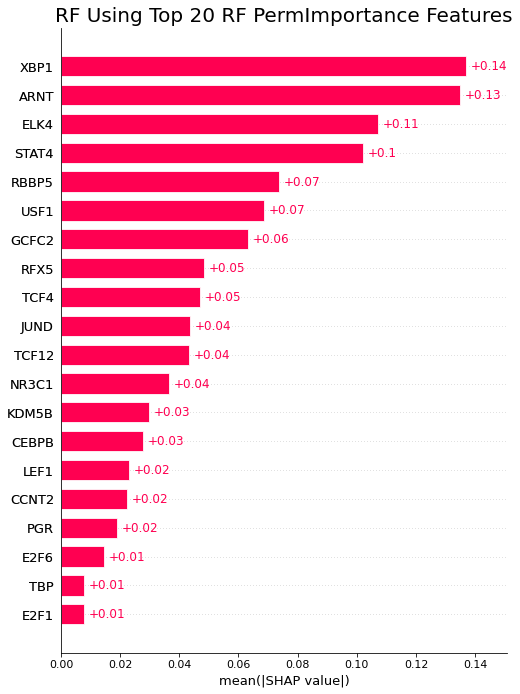

In [10]:
# rf rf perm importance
shapPlots("../models/RF_TOP20_RF_PERM_PARAMS", "RF Using Top 20 RF PermImportance Features", X_RFperm_test)

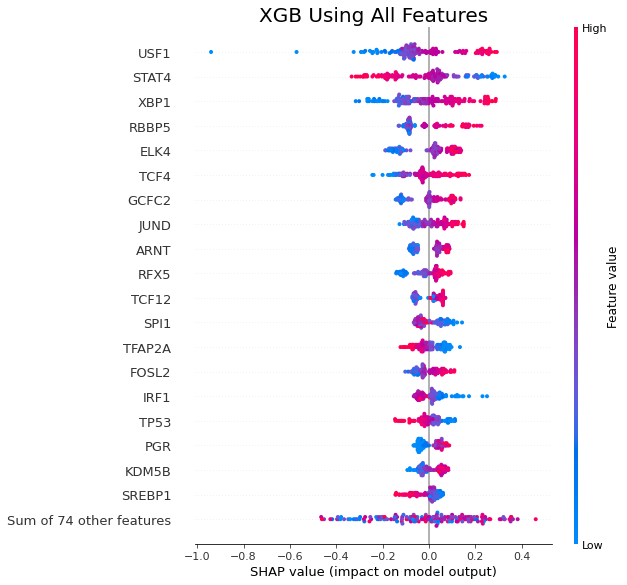

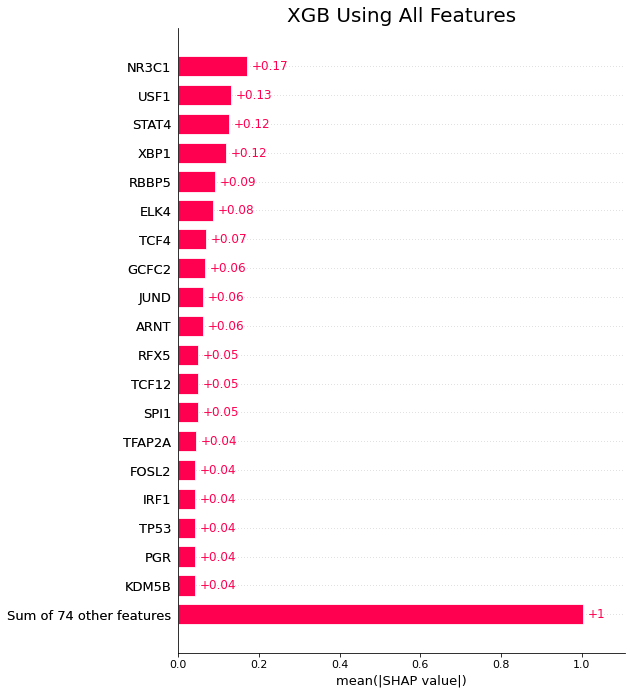

In [11]:
file = open('../models/XGB_ALL_PARAMS', 'rb')
model = pickle.load(file)
file.close()

title = 'XGB Using All Features'

explainer = shap.Explainer(model.best_estimator_)
shap_values = explainer(X_log_test)

shap.plots.beeswarm(shap_values, max_display = 20, show = False)
plt.title(title, size = 20)
plt.savefig('../summary/figures/' + title + ' SHAP Beeswarm Plot')
plt.show()

shap.plots.bar(shap_values, max_display = 20, show = False)
plt.title(title, size = 20)
plt.savefig('../summary/figures/' + title + ' SHAP Bar Plot')
plt.show()

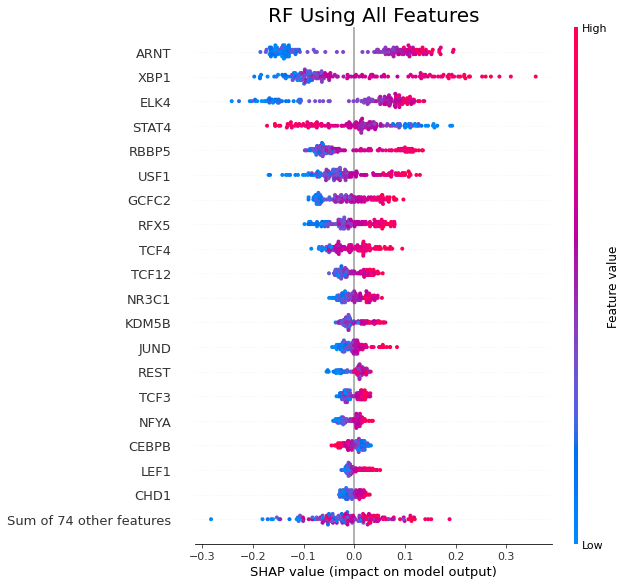

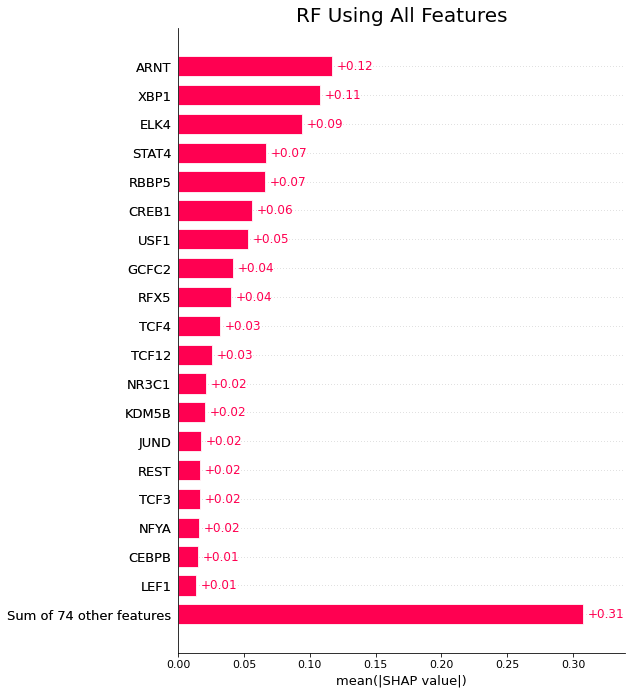

In [12]:
# rf all params
shapPlots("../models/RF_ALL_PARAMS", "RF Using All Features", X_log_test)